In [6]:
import numpy as np
import pandas as pd
import re
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import torch
import torch.nn as nn

# Data Preprocessing
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
import os, nltk, re, string
from nltk.corpus import wordnet as wn
from spacy.cli import download
from spacy import load
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
!pip install Sastrawi
!pip install nltk

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


In [10]:
df = pd.read_csv("makangratis_valid.csv")

In [11]:
df.head()

,full_text,label
0,@iweng01 @akunbarublek @ignasbowo Tpi tujuan a...,N
1,BI Dukung Program Makan Siang Gratis Asalkan T...,P
2,@RizkiDimasDwij @masgah_ @Ipaahu La iya dana b...,N
3,@OposisiCerdas Ya di gaji sama makan siang gra...,N
4,"@RhendyW @marufins Sama kek stunting, solusiny...",N


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  656 non-null    object
 1   label      656 non-null    object
dtypes: object(2)
memory usage: 10.4+ KB


In [13]:
df['full_text'] = df['full_text'].str.lower()

In [14]:
df.head()

,full_text,label
0,@iweng01 @akunbarublek @ignasbowo tpi tujuan a...,N
1,bi dukung program makan siang gratis asalkan t...,P
2,@rizkidimasdwij @masgah_ @ipaahu la iya dana b...,N
3,@oposisicerdas ya di gaji sama makan siang gra...,N
4,"@rhendyw @marufins sama kek stunting, solusiny...",N


In [15]:
df.isnull().sum()

full_text    0
label        0
dtype: int64

In [16]:
label_counts = df['label'].value_counts()

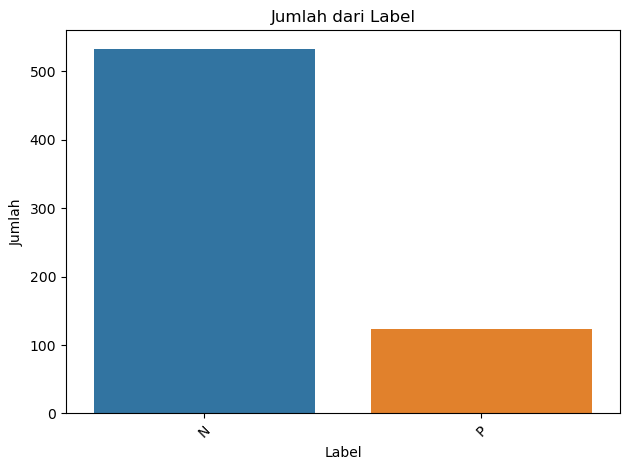

In [17]:
#Buat grafik plot jumlah
data = {
    'labels': label_counts.index,
    'counts': label_counts.values
}

df_counts = pd.DataFrame(data)

ax = sns.barplot(x='labels', y='counts', data=df_counts)
ax.set(xlabel='Label', ylabel='Jumlah', title='Jumlah dari Label')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

#Tampilkan plot jumlah
plt.show()

# Input (Comments) Preprocessing

Text(0, 0.5, 'Number of Comments')

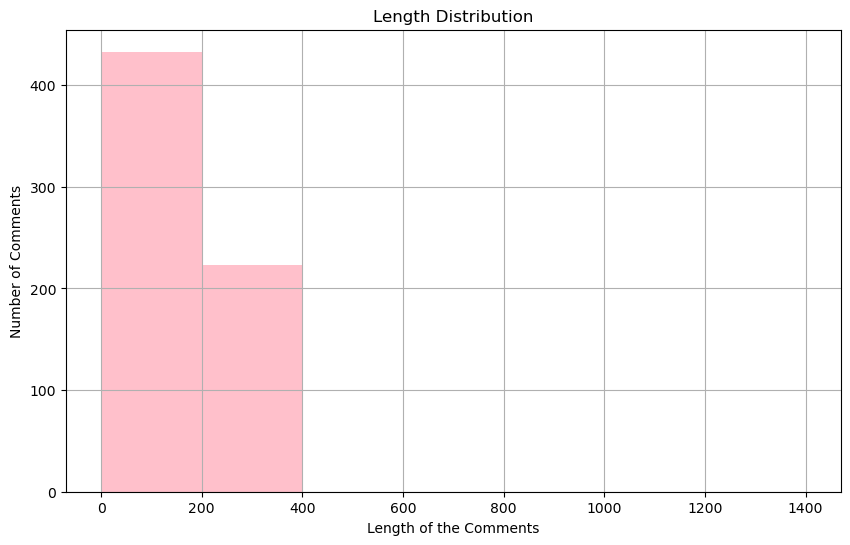

In [18]:
lens=df['full_text'].str.len()
# print(lens)
resize = np.arange(0, 1500,200)
lens.hist(color='pink', figsize=(10, 6), bins=resize,width=200 )
plt.title('Length Distribution')
plt.xlabel('Length of the Comments')
plt.ylabel('Number of Comments')

# Average Length of Comments for Positive and Negative

Average Length of Positive : 168.8617886178862
Average Length of Negative : 164.6266416510319


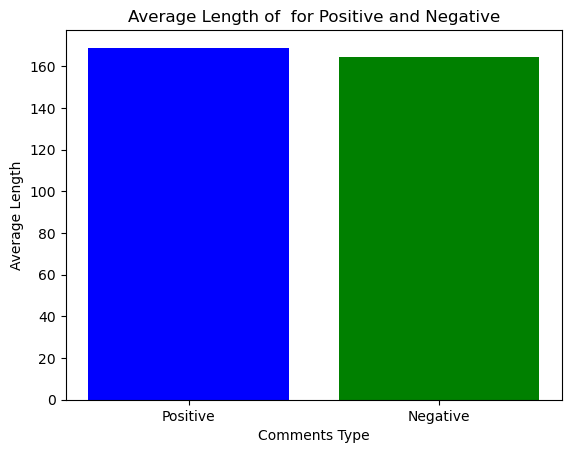

In [19]:
df['Length'] = df['full_text'].apply(len)
df['num_words'] = df['full_text'].apply(word_tokenize).apply(len)
df['num_sentence'] = df['full_text'].apply(sent_tokenize).apply(len)
df.head(2)
avg_length_positive = df[df['label'] == 'P']['Length'].mean()
avg_length_negative = df[df['label'] == 'N']['Length'].mean()

#Plotting the graph
print("Average Length of Positive :", avg_length_positive)
print("Average Length of Negative :", avg_length_negative)
plt.bar(['Positive', 'Negative'], [avg_length_positive, avg_length_negative], color=['Blue', 'green'])
plt.title('Average Length of  for Positive and Negative')
plt.xlabel('Comments Type')
plt.ylabel('Average Length')
plt.show()

# Average Word of Comments for Positive and Negative

Average Words of Positive: 29.45528455284553
Average Words of Negative: 28.70919324577861


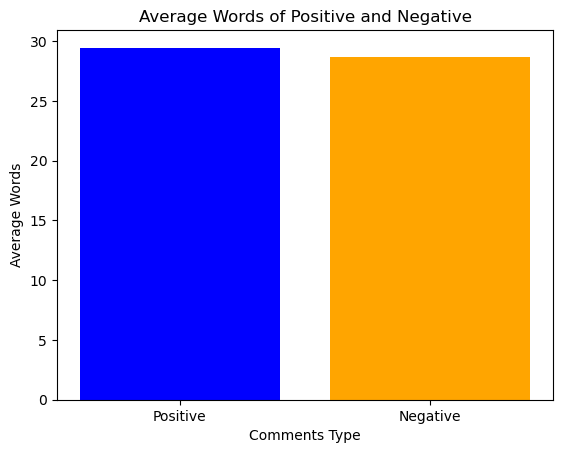

In [20]:
avg_word_positive = df[df['label'] == 'P']['num_words'].mean()
avg_word_negative = df[df['label'] == 'N']['num_words'].mean()
print("Average Words of Positive:", avg_word_positive)
print("Average Words of Negative:", avg_word_negative)

# Plotting the graph
plt.bar(['Positive', 'Negative'], [avg_word_positive, avg_word_negative], color=['Blue', 'orange'])
plt.title('Average Words of Positive and Negative')
plt.xlabel('Comments Type')
plt.ylabel('Average Words')
plt.show()

# Average Sentence of Comments for Positive and Negative

Average Sentence of Positive : 2.040650406504065
Average Sentence of Negative: 1.8442776735459663


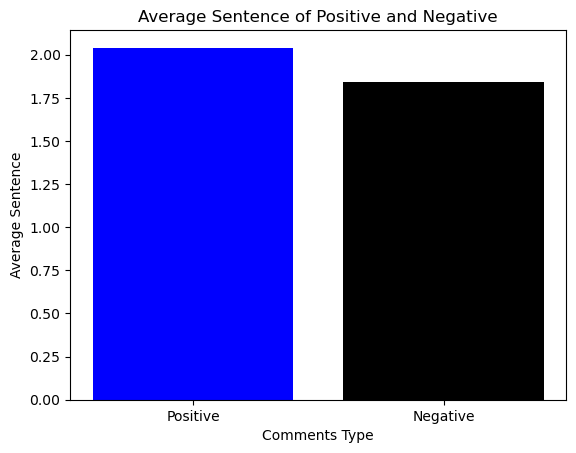

In [21]:
avg_sentence_positive = df[df['label'] == 'P']['num_sentence'].mean()
avg_sentence_negative = df[df['label'] == 'N']['num_sentence'].mean()
print("Average Sentence of Positive :", avg_sentence_positive)
print("Average Sentence of Negative:", avg_sentence_negative)

# Plotting the graph
plt.bar(['Positive', 'Negative'], [avg_sentence_positive, avg_sentence_negative], color=['Blue', 'black'])
plt.title('Average Sentence of Positive and Negative')
plt.xlabel('Comments Type')
plt.ylabel('Average Sentence')
plt.show()

# Relationship between Positive and Negative 

Correlation coefficient between comments length and positive classification: 0.02040695642596159


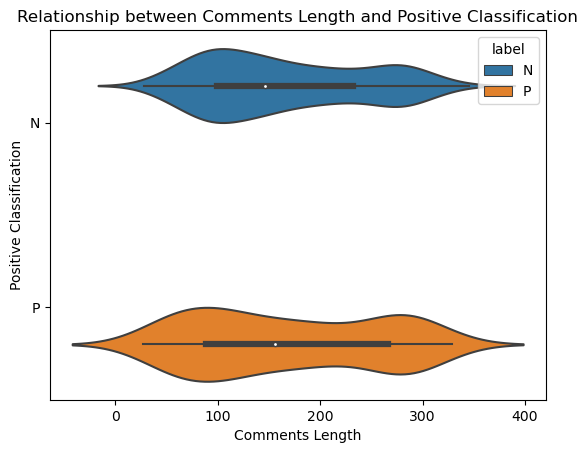

In [22]:
correlation = df['Length'].corr((df['label'] == 'P').astype(int))
print("Correlation coefficient between comments length and positive classification:", correlation)

sns.violinplot(data=df, x='Length', y='label', hue='label')
plt.xlabel('Comments Length')
plt.ylabel('Positive Classification')
plt.title('Relationship between Comments Length and Positive Classification')
plt.show()

Diketahui bahwa hubungan panjang komen dengan klasifikasi positive dan negative adalah panjang komen lebih panjang cenderung lebih mengarah ke komen positive dengan nilai korelasi sebesar 0.02 atau sekitar 2 persen saja. Sehingga dapat disimpulkan panjang komen tidak berpengaruh banyak pada klasifikasi komen tersebut negative atau positive 

# Relationship between Features

The Relationship between Features are                  Length  num_words  num_sentence
Length        1.000000   0.974022      0.498626
num_words     0.974022   1.000000      0.542321
num_sentence  0.498626   0.542321      1.000000


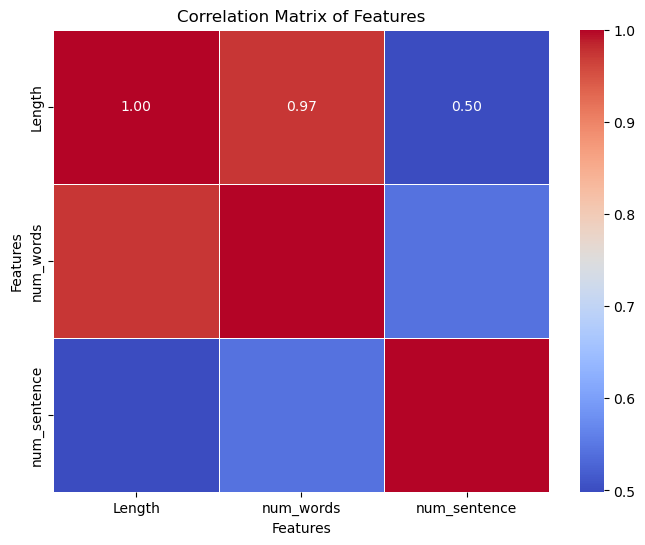

In [23]:
correlation_matrix = df[['Length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are ",correlation_matrix )
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Diketahui bahwa korelasi antara panjang kalimat dengan banyaknya kata sangat berdekatan dibandingkan panjang kalimat dengan banyaknya kalimat. Sehingga dapat disimpulkan orang cenderung menuliskan twitt pada platform X dengan lebih banyak kata-kata daripada banyak kalimat yang mana mengindisikan orang - orang sering menuliskan twittnya dengan kata singkatan yang mana ini sering digunakan untuk mengungkapkan apa yang ada dipikirannya lebih ekspresif dan tidak terlalu formal

# Text Preprocessing

In [24]:
def remove_tweet_special(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    text = re.sub(r'@[A-Za-z0-9_]+','', text)
    text = re.sub(r'#\w+','', text)
    text = re.sub(r'RT[\s]','', text)
    text = re.sub(r'https?://\S+','', text)
    text = re.sub(r'r\$\w*', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[0-9]+', '',text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text_bersih'] = df['full_text'].apply(remove_tweet_special)

df[['full_text','text_bersih']]

,full_text,text_bersih
0,@iweng01 @akunbarublek @ignasbowo tpi tujuan a...,tpi tujuan awal dari makan siang gratis ini ka...
1,bi dukung program makan siang gratis asalkan t...,bi dukung program makan siang gratis asalkan t...
2,@rizkidimasdwij @masgah_ @ipaahu la iya dana b...,"_ la iya dana bos aja dikorup, apalagi ada pro..."
3,@oposisicerdas ya di gaji sama makan siang gra...,ya di gaji sama makan siang gratis lah
4,"@rhendyw @marufins sama kek stunting, solusiny...","sama kek stunting, solusinya makan siang grati..."
...,...,...
651,@toe_giman @alham1970 bohong mulu... 10.tahun ...,_giman bohong mulu... .tahun sudah menjabat la...
652,@y_d_y_p makan siang gratis di negara jepang ...,_d_y_p makan siang gratis di negara jepang neg...
653,@undipmenfess nikmatin aja tuh makan siang gra...,"nikmatin aja tuh makan siang gratis nya, sampe..."
654,@mdy_asmara1701 @punggawatikkor1 yang penting ...,"_asmara yang penting makan siang gratis, pendi..."


In [25]:
custom_stopwords = {'yg', 'utk', 'cuman', 'deh', 'Btw', 'tapi', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntr', 'nya', 'lg', 'gk', 'ecusli', 'dpt',
    'dr', 'kpn', 'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'km', 'eh',
    'sih', 'eh', 'bang', 'br', 'kyk', 'rp', 'jt', 'kan', 'gpp', 'sm', 'usah',
    'mas', 'sob', 'thx', 'ato', 'jg', 'gw', 'wkwkwk', 'mak', 'haha', 'iy', 'k','t',
    'tp','haha', 'dg', 'dri', 'duh', 'ye', 'wkwk', 'syg', 'btw',
    'nerjemahin', 'gaes', 'guys', 'moga', 'kmrn', 'nemu', 'yukk',
    'wkwkw', 'klas', 'iw', 'ew', 'lho', 'sbnry', 'org', 'gtu', 'bwt',
    'krlga', 'clau', 'lbh', 'cpet', 'ku', 'wke', 'mba', 'mas', 'sdh', 'kmrn',
    'oi', 'spt', 'dlm', 'bs', 'krn', 'jgn', 'sapa', 'spt', 'sh', 'wakakaka',
    'sihhh', 'hehe', 'ih', 'dgn', 'la', 'kl', 'ttg', 'mana', 'kmna', 'kmn',
    'tdk', 'tuh', 'dah', 'kek', 'ko', 'pls', 'bbrp', 'pd', 'mah', 'dhhh',
    'kpd', 'tuh', 'kzl', 'byar', 'si', 'sii', 'cm', 'sy', 'hahahaha', 'weh','n',
    'dlu', 'tuhh','tpi','krn','kl','kbnykn','jd','lah',
    'dong','koq','pdhl','dg','tp','amp','wlpun','pst','tuk',
    'laaah','si','trs','tuh','cuyy','ehem','sih','di','d','kalee','jg','emg','wkwkwkw','anjritt','sih',
    'kok','mbok','nie','sj','ajg','ente','hm','yang','tau','kjmu','gimana','kayak','nggak','klo','dar',
    'aja','rb','emang','karna','gin','ngga','msh','iya','kah','pake','kayanya','gitu','doang','jadi','bangasal'}

# Baca file CSV yang berisi kolom before dan after
normalisasi_df = pd.read_csv('normalisasi_twitter.csv')

# Buat kamus untuk normalisasi singkatan
kamus_normalisasi = dict(zip(normalisasi_df['before'], normalisasi_df['after']))

# Definisikan fungsi untuk normalisasi singkatan
def normalisasi(text, normalisasi_dict):
    words = word_tokenize(text)
    normalized_words = [normalisasi_dict.get(word.lower(), word) for word in words]
    return ' '.join(normalized_words)

# Definisikan fungsi untuk menghapus stopword
def remove_stopwords(text, custom_stopwords=set()):
    stop_words = set(stopwords.words('indonesian'))
    # Gabungkan stopwords dari NLTK dengan stopword kustom
    stop_words = stop_words.union(custom_stopwords)
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Gabungkan normalisasi dan penghapusan stopword dalam satu langkah
df['text_stopword_dihapus'] = df['text_bersih'].apply(lambda x: remove_stopwords(normalisasi(x, kamus_normalisasi), custom_stopwords))
df[['text_bersih','text_stopword_dihapus']]

,text_bersih,text_stopword_dihapus
0,tpi tujuan awal dari makan siang gratis ini ka...,tujuan makan siang gratis perbaikan gizi pence...
1,bi dukung program makan siang gratis asalkan t...,bi dukung program makan siang gratis ganggu st...
2,"_ la iya dana bos aja dikorup, apalagi ada pro...","_ dana bos dikorup , proyek makan siang gratis..."
3,ya di gaji sama makan siang gratis lah,gaji makan siang gratis
4,"sama kek stunting, solusinya makan siang grati...","stunting , solusinya makan siang gratis menyel..."
...,...,...
651,_giman bohong mulu... .tahun sudah menjabat la...,_giman bohong mulu ... .tahun menjabat lapanga...
652,_d_y_p makan siang gratis di negara jepang neg...,_d_y_p makan siang gratis negara jepang negeri...
653,"nikmatin aja tuh makan siang gratis nya, sampe...","nikmatin makan siang gratis , sampe mencret"
654,"_asmara yang penting makan siang gratis, pendi...","_asmara makan siang gratis , pendidikan nomor ..."


# Tokenized Text

In [26]:
#Tokenize and Pad the sentences
tokenize = Tokenizer()
df['tokenized_text'] = df['text_stopword_dihapus'].apply(lambda x:x.split())

# Stemming

In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function to stem a single term
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Create a dictionary to store unique terms and their stems
term_base = {}

# Iterate through each document in tokenized_text and populate term_base
for document in df['tokenized_text']:
    for term in document:
        if term not in term_base:
            term_base[term] = " "

# Stemming terms and storing them in term_base
for term in term_base:
    term_base[term] = stemmed_wrapper(term)

# Function to get stemmed terms from a document
def get_stemmed_term(document):
    return [term_base[term] for term in document]

# Apply get_stemmed_term function to tokenized_text column and store results in stemmed_text
df['stemmed_text'] = df['tokenized_text'].apply(get_stemmed_term)

# Print the DataFrame with stemmed_text column
df[['tokenized_text','stemmed_text']]

,tokenized_text,stemmed_text
0,"[tujuan, makan, siang, gratis, perbaikan, gizi...","[tuju, makan, siang, gratis, baik, gizi, cegah..."
1,"[bi, dukung, program, makan, siang, gratis, ga...","[bi, dukung, program, makan, siang, gratis, ga..."
2,"[_, dana, bos, dikorup, ,, proyek, makan, sian...","[, dana, bos, korup, , proyek, makan, siang, g..."
3,"[gaji, makan, siang, gratis]","[gaji, makan, siang, gratis]"
4,"[stunting, ,, solusinya, makan, siang, gratis,...","[stunting, , solusi, makan, siang, gratis, sel..."
...,...,...
651,"[_giman, bohong, mulu, ..., .tahun, menjabat, ...","[gim, bohong, mulu, , tahun, jabat, lapang, ke..."
652,"[_d_y_p, makan, siang, gratis, negara, jepang,...","[d y p, makan, siang, gratis, negara, jepang, ..."
653,"[nikmatin, makan, siang, gratis, ,, sampe, men...","[nikmatin, makan, siang, gratis, , sampe, menc..."
654,"[_asmara, makan, siang, gratis, ,, pendidikan,...","[asmara, makan, siang, gratis, , didik, nomor,..."


In [30]:
tokenize.fit_on_texts(df['text_stopword_dihapus'])
token_sent = tokenize.texts_to_sequences(df['text_stopword_dihapus'])
df['tokenized_sent'] = token_sent
max_len = max([len(seq) for seq in df['tokenized_sent']])

word_voc_length = len(tokenize.word_index) + 1

In [31]:
#Pad the sentences
pad_sent = pad_sequences(token_sent, maxlen=max_len, padding='pre')

In [32]:
#Input and Output dataset
label_mapping = {'N': 0, 'P': 1}

# Apply the mapping to the label column
df['label'] = df['label'].map(label_mapping)

# Now convert the labels to a NumPy array and ensure they are of type int32
X = pad_sent
Y = df['label'].values.astype('int32')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=7)

In [34]:
word_voc_length

2762

In [35]:
df.head()

,full_text,label,Length,num_words,num_sentence,text_bersih,text_stopword_dihapus,tokenized_text,stemmed_text,tokenized_sent
0,@iweng01 @akunbarublek @ignasbowo tpi tujuan a...,0,313,56,3,tpi tujuan awal dari makan siang gratis ini ka...,tujuan makan siang gratis perbaikan gizi pence...,"[tujuan, makan, siang, gratis, perbaikan, gizi...","[tuju, makan, siang, gratis, baik, gizi, cegah...","[554, 2, 3, 1, 281, 55, 368, 41, 368, 41, 942,..."
1,bi dukung program makan siang gratis asalkan t...,1,99,14,1,bi dukung program makan siang gratis asalkan t...,bi dukung program makan siang gratis ganggu st...,"[bi, dukung, program, makan, siang, gratis, ga...","[bi, dukung, program, makan, siang, gratis, ga...","[951, 89, 4, 2, 3, 1, 952, 953, 556]"
2,@rizkidimasdwij @masgah_ @ipaahu la iya dana b...,0,265,48,1,"_ la iya dana bos aja dikorup, apalagi ada pro...","_ dana bos dikorup , proyek makan siang gratis...","[_, dana, bos, dikorup, ,, proyek, makan, sian...","[, dana, bos, korup, , proyek, makan, siang, g...","[9, 11, 369, 49, 2, 3, 1, 370, 954, 214, 214, ..."
3,@oposisicerdas ya di gaji sama makan siang gra...,0,53,10,1,ya di gaji sama makan siang gratis lah,gaji makan siang gratis,"[gaji, makan, siang, gratis]","[gaji, makan, siang, gratis]","[125, 2, 3, 1]"
4,"@rhendyw @marufins sama kek stunting, solusiny...",0,140,23,1,"sama kek stunting, solusinya makan siang grati...","stunting , solusinya makan siang gratis menyel...","[stunting, ,, solusinya, makan, siang, gratis,...","[stunting, , solusi, makan, siang, gratis, sel...","[41, 285, 2, 3, 1, 559, 560, 955, 286, 956]"


In [36]:
df.to_csv('data_preprocessing.csv', index=False)

# Model

In [37]:
# Building Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from keras.regularizers import l1, l2

model = Sequential()
model.add(Embedding(word_voc_length, 150, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(20, activation='relu', kernel_regularizer=l2(l2=0.05)))  # Kurangi neuron, tingkatkan L2
model.add(Dropout(0.4))  # Tingkatkan dropout
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))


# ... compile and fit model ...
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 150)           414300    
                                                                 
 global_average_pooling1d (G  (None, 150)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 20)                3020      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 417,341
Trainable params: 417,341
Non-trainable params: 0
__________________________________________________

In [39]:
print(np.unique(y_train))

[0 1]


In [40]:
import numpy as np
from sklearn.utils import class_weight
# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Fit the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), class_weight=class_weight_dict)

Epoch 1/30
15/15 [==============================] - 3s 45ms/step - loss: 2.2748 - accuracy: 0.6340 - val_loss: 2.0642 - val_accuracy: 0.7970
Epoch 2/30
15/15 [==============================] - 0s 18ms/step - loss: 1.9193 - accuracy: 0.6253 - val_loss: 1.7507 - val_accuracy: 0.8122
Epoch 3/30
15/15 [==============================] - 0s 16ms/step - loss: 1.6357 - accuracy: 0.7015 - val_loss: 1.5034 - val_accuracy: 0.8122
Epoch 4/30
15/15 [==============================] - 0s 14ms/step - loss: 1.4105 - accuracy: 0.7996 - val_loss: 1.3067 - val_accuracy: 0.8071
Epoch 5/30
15/15 [==============================] - 0s 11ms/step - loss: 1.2357 - accuracy: 0.8039 - val_loss: 1.1610 - val_accuracy: 0.7970
Epoch 6/30
15/15 [==============================] - 0s 11ms/step - loss: 1.1006 - accuracy: 0.8344 - val_loss: 1.0434 - val_accuracy: 0.8173
Epoch 7/30
15/15 [==============================] - 0s 14ms/step - loss: 0.9981 - accuracy: 0.8257 - val_loss: 0.9547 - val_accuracy: 0.8173
Epoch 8/30
15

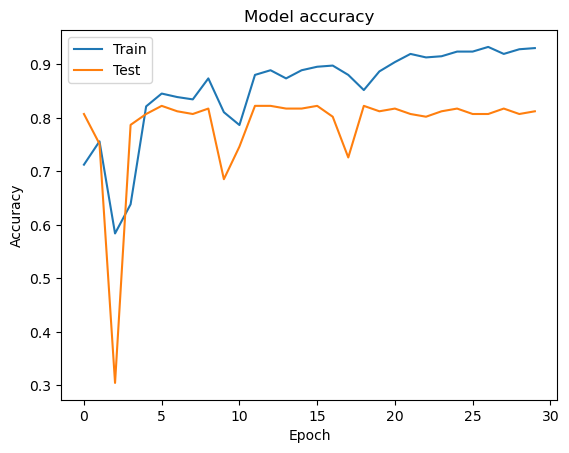

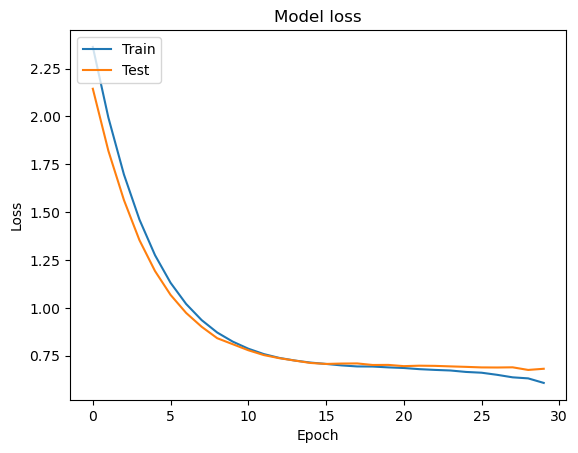

In [108]:
import matplotlib.pyplot as plt

#plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


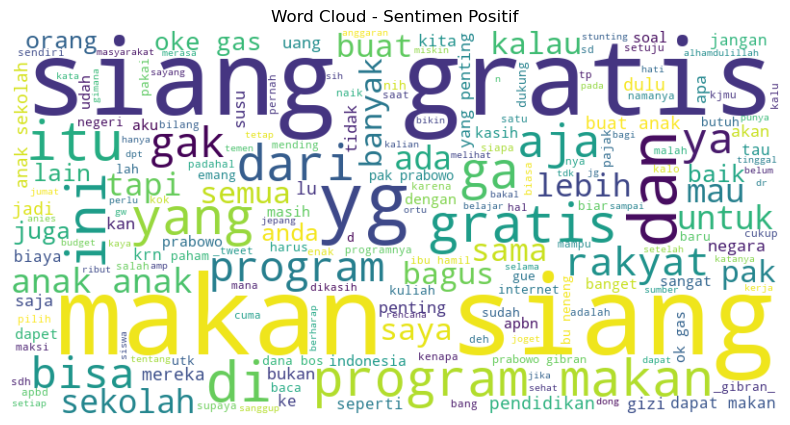

In [124]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Misalnya kolom label Anda bernama 'sentiment' dan sentimen positif bernilai 'positive'
positive_text = ' '.join(df[df['label'] == 1 ]['text_bersih'])

# Membuat word cloud hanya dari teks sentimen positif
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Visualisasi word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Positif')
plt.axis('off')
plt.show()

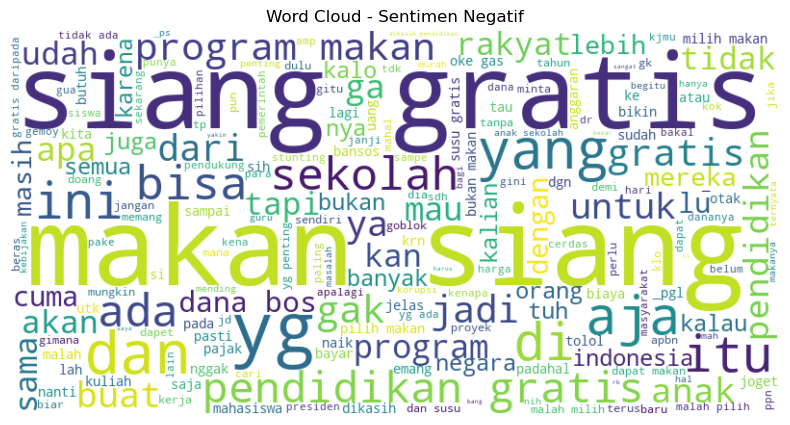

In [125]:
# Misalnya kolom label Anda bernama 'sentiment' dan sentimen positif bernilai 'positive'
positive_text = ' '.join(df[df['label'] == 0 ]['text_bersih'])

# Membuat word cloud hanya dari teks sentimen positif
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Visualisasi word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Negatif')
plt.axis('off')
plt.show()